In [55]:
## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [297]:
####### GET SEQUENCES FUNCTION ########
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

## Documentation
# This function reads the FASTA files and extracts the necessary data - input file is fasta_fn
# For each record, it splits up the description line and extracts the genus and species name
# It also extracts the cytochrome b gene sequence for each record, storing it with the species name
# Data is saved as a dictionary - key:value pair of species:sequence

# defines the input file name and runs the function on it to create a dictionary named 'sequence_data' for downstream use
fasta_fn = "penguins_cytb.fasta"
sequence_data = get_sequences_from_file(fasta_fn)
print(sequence_data)
type(sequence_data)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

dict

In [161]:
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

## MY FUNCTION

# initializes function, string of amino acid sequences
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
# goes through sequence and finds triplet codons
    for i in range(0, len(string_nucleotides), 3):
        codon = string_nucleotides[i:i+3]
# stops it if it hits stop codon
        if codon in mito_table.stop_codons:
            break
# adds codons to amino acid sequence
        aa = mito_table.forward_table.get(codon)
        aa_seq_string += aa
    return aa_seq_string

translate_function("CATATGCCA")

'HMP'

In [163]:
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

## MY FUNCTION

# Using Bio.Seq.translate - https://biopython.org/docs/dev/api/Bio.Seq.html
from Bio.Seq import Seq

def seq_translate(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    seq = Seq(string_nucleotides)
    aa_seq_string = seq.translate(table=mito_table)

    return str(aa_seq_string)

seq_translate("CATATGCCA")

'HMP'

In [239]:
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

## MY FUNCTION

# using documentation from http://biopython.org/wiki/ProtParam

from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    # Forces AA sequence to be a string with no stop codons
    aa_seq_string = str(aa_seq).replace('*', '')
    
    # Performs protein analysis on the amino acid sequence
    mw = ProteinAnalysis(aa_seq_string)
    
    # Calculates the molecular weight of the protein
    molecular_weight = mw.molecular_weight()

    return molecular_weight

compute_molecular_weight("CATATGCCA")

799.9368

In [293]:
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.


#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

def gc_content(dna_seq):
    # counts number of Gs and Cs in sequence, divides by total sequence length to give GC fraction, multiplies by 100 to return as a percentage
    g_count = dna_seq.count('G')
    c_count = dna_seq.count('C')
    gc_content = ((g_count + c_count) / len(dna_seq))*100
    return gc_content

gc_content("ATCGCATGCATATAGCCGACGTACGATGCAACATGCCGCAGAGACT")

52.17391304347826

In [295]:
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

# using numpy to assign all values in new columsn to NaN - https://www.educative.io/answers/how-to-assign-nan-to-a-variable-in-python

import numpy as np

penguins_df["molecular_weight"] = np.nan
penguins_df["GC_content"] = np.nan
print(penguins_df)

                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


In [265]:
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

# using the sequence translate function from Bio Seq - https://biopython.org/docs/dev/api/Bio.Seq.html
# translates sequence from each sequence, calculates molecular weight from AA sequence, calculates GC content


for key, value in cytb_seqs.items():
    dna_seq = str(value)
    aa_seq = seq_translate(dna_seq)
    molecular_weight = compute_molecular_weight(aa_seq)
    gc = gc_content(dna_seq)

# updates penguins_df with new information, using the species name as the common column to match
# used loc to update data frame - https://stackoverflow.com/questions/34499584/use-of-loc-to-update-a-dataframe-python-pandas
    
    penguins_df.loc[penguins_df['species'] == key, 'molecular_weight'] = molecular_weight
    penguins_df.loc[penguins_df['species'] == key, 'GC_content'] = gc

print(penguins_df)

                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

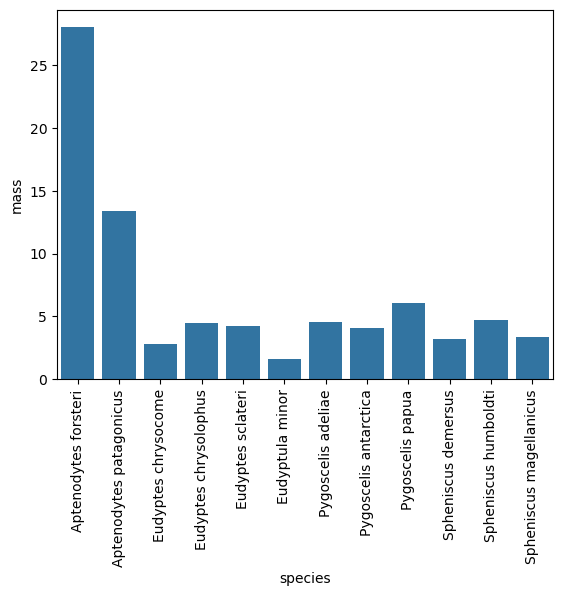

In [283]:
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?


# using seaborn bar chart - https://seaborn.pydata.org/generated/seaborn.barplot.html
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='species', y='mass', data=penguins_df,)
# rotating X axis labels to make species names legible
plt.xticks(rotation=90)

# Q1: according to the chart, Eudyptula minor is the smallest species 
# Q2: according to https://animaldiversity.org/accounts/Eudyptula_minor/ , the range of the species is southern Australia and the coasts of New Zealand

<Axes: xlabel='GC_content', ylabel='molecular_weight'>

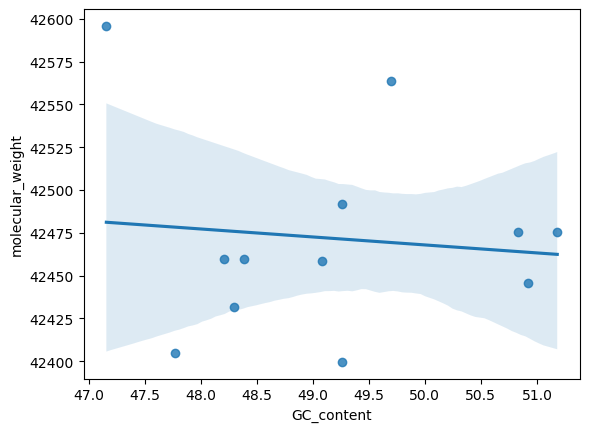

In [289]:
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

# using seaborn regresion plot - https://seaborn.pydata.org/generated/seaborn.regplot.html

sns.regplot(x='GC_content', y='molecular_weight', data=penguins_df)

# not much of an association seen - weak negative slope, lots of variance

In [269]:
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"

# used dataframe to csv function - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

In [ ]:
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)